In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import torchvision.transforms as T
from glob import glob
from natsort import natsorted
import os
from tqdm import tqdm

/home/siddhibrahmbhatt/miniconda3/envs/Libcom/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Foreground data visualization:

In [2]:
from foreground_loader import IP102Dataset, ForegroundBlur, ForegroundRotate

In [3]:
dataset_dir = "/bucket/siddhi/pestvision_data/foreground/Detection_IP102/VOC2007"

transform_BlurRotate = T.Compose(
    [ForegroundBlur(blur_prob=0.35), ForegroundRotate(rotation_prob=0.35)]
)

ip102_dataset_train = IP102Dataset(
        dataset_dir=dataset_dir,
        split="train",
        source_image_range_big=(40, 60),
        source_image_range_small=(60, 80),
        transform=transform_BlurRotate,
    )

print("Number of training images: ", len(ip102_dataset_train))

ip102_dataset_val = IP102Dataset(
        dataset_dir=dataset_dir,
        split="val",
        source_image_range_big=(40, 60),
        source_image_range_small=(60, 80),
        transform=transform_BlurRotate,
    )   

print("Number of validation images: ", len(ip102_dataset_val))

ip102_dataset_test = IP102Dataset(
        dataset_dir=dataset_dir,
        split="test",
        source_image_range_big=(40, 60),
        source_image_range_small=(60, 80),
        transform=transform_BlurRotate,
    )

print("Number of test images: ", len(ip102_dataset_test))

Number of training images:  12104
Number of validation images:  3069
Number of test images:  3796


In [4]:
sample = ip102_dataset_train[0]

# Print sample information
print("Sample Information:")
print("source_img_resized size:", sample['source_img_resized'].size)
print("mask_img_resized size:", sample['mask_img_resized'].size)
print("pest_class_id:", sample['pest_class_id'])
print("source_size:", sample['source_size'])
print("source_filename:", sample['source_filename'])
print("is_big:", sample['is_big'])
print("Keys:", sample.keys())

Sample Information:
source_img_resized size: (77, 77)
mask_img_resized size: (77, 77)
pest_class_id: 0
source_size: 77
source_filename: /bucket/siddhi/pestvision_data/foreground/Detection_IP102/VOC2007/JPEGImages/IP000000169.jpg
is_big: False
Keys: dict_keys(['source_img_resized', 'mask_img_resized', 'pest_class_id', 'source_size', 'source_filename', 'is_big'])


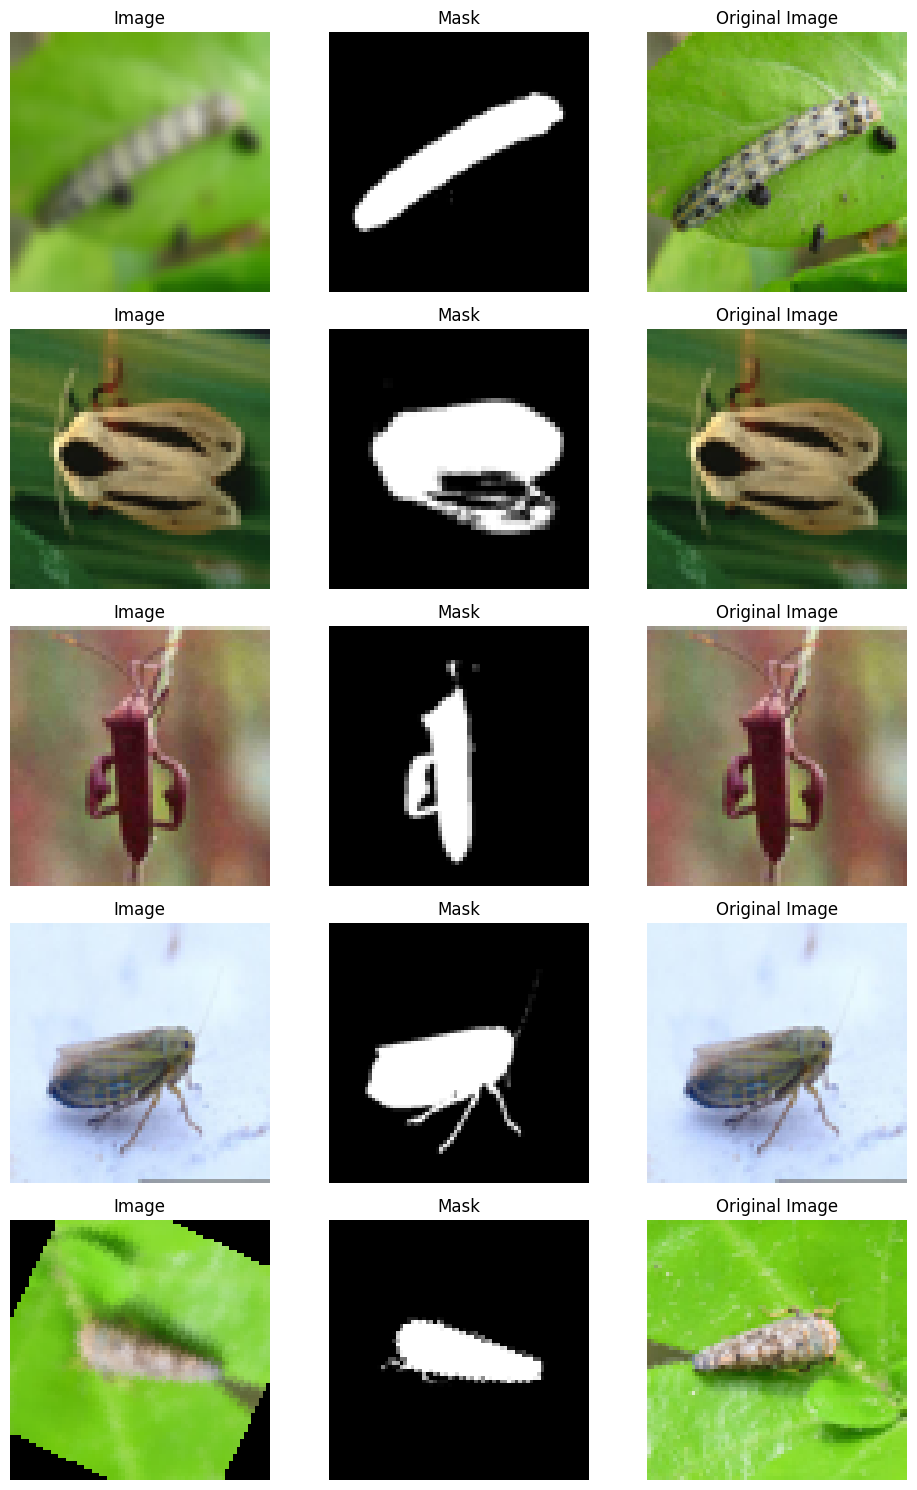

In [5]:
# Randomly display some images and corresponding masks

# Define the number of images to display
num_images = 5

# Get random indices
random_indices = random.sample(range(len(ip102_dataset_train)), num_images)

# Display the images and masks
fig, axes = plt.subplots(num_images, 3, figsize=(10, 15))

for i, idx in enumerate(random_indices):
    sample = ip102_dataset_train[idx]

    source_filename = sample['source_filename']
    ss = sample['source_size']
    image = sample['source_img_resized']
    mask = sample['mask_img_resized']
    
    orig_image = Image.open(source_filename).convert('RGB').resize((ss, ss))

    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')
    
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Mask')

    axes[i, 2].imshow(orig_image)
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Original Image')

plt.tight_layout()
plt.show()


## Background Data visualization

In [6]:
from background_loader import PaddyDiseaseClassificationDataset, RiceLeafsDataset, BackgroundRandomCrop

In [7]:
paddy_disease_classification_dir = "/bucket/siddhi/pestvision_data/background_data/paddy_disease_classification"
rice_leafs_dir = "/bucket/siddhi/pestvision_data/background_data/RiceLeafs"

background_transform = BackgroundRandomCrop(crop_prob=0.6)

paddy_disease_classification_dataset_train= PaddyDiseaseClassificationDataset(dataset_dir=paddy_disease_classification_dir, 
                                                                              split="train", transform=background_transform,
                                                                              target_size=512)
print("Number of training images in Paddy Disease Classification dataset: ", len(paddy_disease_classification_dataset_train))

paddy_disease_classification_dataset_val= PaddyDiseaseClassificationDataset(dataset_dir=paddy_disease_classification_dir,
                                                                            split="val", transform=background_transform,
                                                                            target_size=512)
print("Number of validation images in Paddy Disease Classification dataset: ", len(paddy_disease_classification_dataset_val))

paddy_disease_classification_dataset_test= PaddyDiseaseClassificationDataset(dataset_dir=paddy_disease_classification_dir,
                                                                                split="test", transform=background_transform,
                                                                                target_size=512)
print("Number of test images in Paddy Disease Classification dataset: ", len(paddy_disease_classification_dataset_test))


rice_leafs_dataset_train= RiceLeafsDataset(dataset_dir=rice_leafs_dir, split="train", transform=background_transform,
                                            target_size=512)
print("Number of training images in Rice Leaf dataset: ", len(rice_leafs_dataset_train))

rice_leafs_dataset_val= RiceLeafsDataset(dataset_dir=rice_leafs_dir, split="val", transform=background_transform,
                                            target_size=512)
print("Number of validation images in Rice Leaf dataset: ", len(rice_leafs_dataset_val))

rice_leafs_dataset_test= RiceLeafsDataset(dataset_dir=rice_leafs_dir, split="test", transform=background_transform,
                                            target_size=512)
print("Number of test images in Rice Leaf dataset: ", len(rice_leafs_dataset_test))

Number of training images in Paddy Disease Classification dataset:  6762
Number of validation images in Paddy Disease Classification dataset:  1559
Number of test images in Paddy Disease Classification dataset:  2086
Number of training images in Rice Leaf dataset:  2180
Number of validation images in Rice Leaf dataset:  502
Number of test images in Rice Leaf dataset:  673


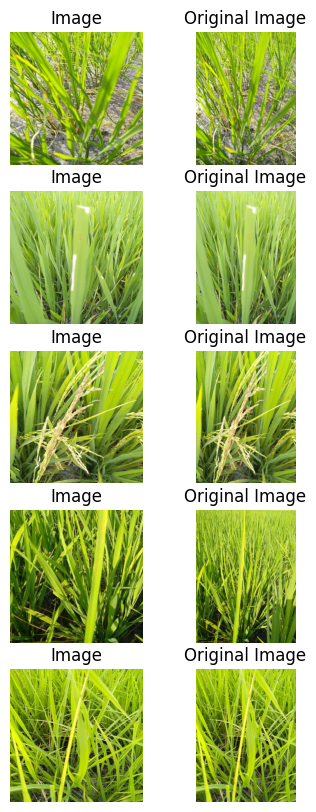

In [8]:
# Randomly display some images and corresponding original images

# Define the number of images to display
num_images = 5

# Get random indices
random_indices = random.sample(range(len(paddy_disease_classification_dataset_train)), num_images)

# Display the images and original images

fig, axes = plt.subplots(num_images, 2, figsize=(4, 10))

for i, idx in enumerate(random_indices):
    sample = paddy_disease_classification_dataset_train[idx]

    image = sample['image']
    
    target_filename = sample['image_filename']
    orig_image = Image.open(target_filename).convert('RGB')
    
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')
    
    axes[i, 1].imshow(orig_image)
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Original Image')